Goal
===

Build a predictive model that is able to predict the average mood of the user on the next day based on the data we obtained from the user on the days before.

Exploration
===

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15,5]

In [3]:
dateparse=lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
df=pd.read_csv('dataset_mood_smartphone.csv', 
               header=1, 
               names=['uid','patient','time','variable','value'], 
               parse_dates=['time'], 
               date_parser=dateparse)

In [4]:
df.sample(30)

uid  patient                    time              variable  \
98271     98273  AS14.23 2014-04-14 15:20:03.687                screen   
310318   490032  AS14.03 2014-03-24 12:57:28.229  appCat.entertainment   
352134  1644125  AS14.01 2014-04-20 15:39:28.165         appCat.social   
34585     34587  AS14.27 2014-05-10 10:00:00.000              activity   
353989  1680518  AS14.06 2014-04-16 20:58:41.846         appCat.social   
358796  1738414  AS14.16 2014-04-23 23:29:08.706         appCat.social   
6628       6630  AS14.06 2014-04-23 18:00:00.000    circumplex.arousal   
97097     97099  AS14.23 2014-04-07 10:08:32.631                screen   
201507   161412  AS14.26 2014-05-23 21:05:36.459        appCat.builtin   
144343   206111  AS14.01 2014-03-26 19:16:48.921        appCat.builtin   
288307   377998  AS14.25 2014-04-10 12:45:38.059  appCat.communication   
367513  1836855  AS14.30 2014-04-11 11:56:24.931         appCat.social   
156942   549461  AS14.07 2014-03-26 13:26:13.104        appCat.builtin   
178470  1130081  AS14.17 2014-04-26 10:39:59.203        appCat.builtin   
211814   177798  AS14.28 2014-04-14 18:01:40.915        appCat.builtin   
251575   282406  AS14.06 2014-04-23 20:50:58.839  appCat.communication   
229337   224458  AS14.33 2014-04-24 12:21:01.851        appCat.builtin   
301830   433950  AS14.30 2014-04-01 20:58:56.328  appCat.communication   
306715   451377  AS14.32 2014-04-13 14:31:43.387  appCat.communication   
41437     41439  AS14.01 2014-04-02 10:28:19.226                screen   
276291   350755  AS14.19 2014-04-11 18:41:01.723  appCat.communication   
253252   287352  AS14.07 2014-03-23 11:56:39.516  appCat.communication   
329956   575838  AS14.17 2014-04-10 15:37:20.502  appCat.entertainment   
23016     23018  AS14.08 2014-03-31 16:00:00.000              activity   
65115     65117  AS14.07 2014-04-07 15:29:44.717                screen   
122253   122255  AS14.29 2014-05-01 13:34:55.112                screen   
117656   117658  AS14.28 2014-04-21 17:09:54.581                screen   
129140   129142  AS14.31 2014-04-21 22:03:00.931                screen   
21496     21498  AS14.06 2014-04-24 10:00:00.000              activity   
101759   101761  AS14.23 2014-05-03 15:43:40.763                screen   

             value  
98271    65.443000  
310318    1.353000  
352134   15.464000  
34585     0.108333  
353989   80.437000  
358796   18.024000  
6628      0.000000  
97097     5.315000  
201507    3.718000  
144343    1.708000  
288307    7.066000  
367513   44.287000  
156942   14.906000  
178470    4.855000  
211814    3.064000  
251575   96.982000  
229337    2.012000  
301830  112.643000  
306715    1.148000  
41437     5.842000  
276291    3.008000  
253252    5.200000  
329956  866.931000  
23016     0.316667  
65115    65.412000  
122253   13.094000  
117656   47.396000  
129140   20.458000  
21496     0.150000  
101759    5.294000

In [5]:
# how many patients?
df.patient.unique().size

27

In [21]:
ax = pd.DataFrame(df.patient.value_counts()).plot.bar(legend=None,title='User usage freq.', fontsize=20);
ax.set_xlabel('User', size=20)
ax.set_ylabel('No. of data points', size=20)

In [22]:
# which are the popular variables?
ax = pd.DataFrame(df.variable.value_counts()).plot.bar(legend=None,title='Variable usage freq.', fontsize=20);
ax.set_xlabel('Variable', size=20)
ax.set_ylabel('No. of data points', size=20)

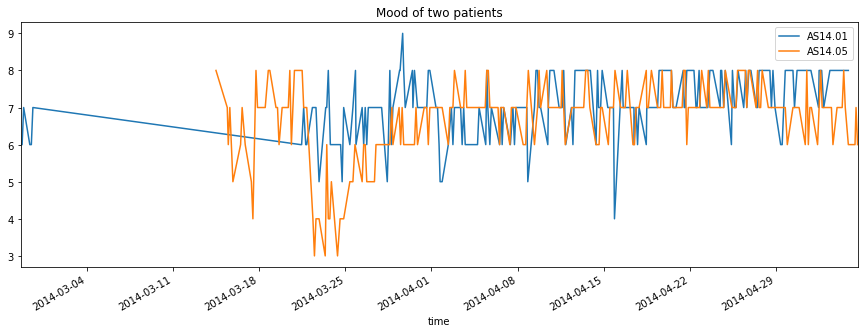

In [100]:
#look at a couple of patients' mood over time
fig, ax = plt.subplots()
for key, grp in df[(df.patient.isin(['AS14.01','AS14.05'])) & (df.variable=='mood')].groupby(['patient']):
    ax = grp.plot(ax=ax, kind='line', x='time', y='value', label=key,title='Mood of two patients')
plt.show()

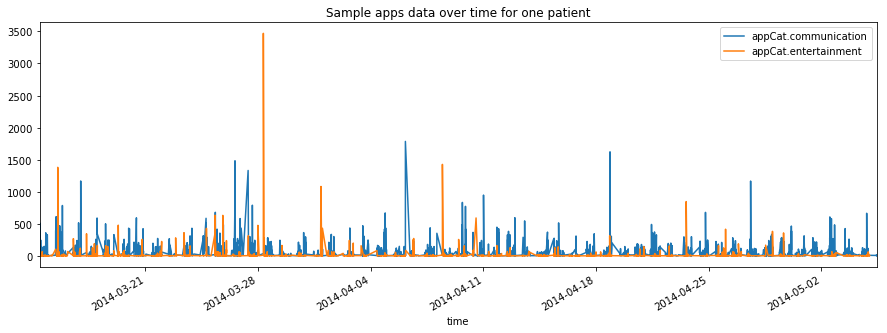

In [101]:
# look at the usage of a couple of apps of that patient with the dropped mood
fig, ax = plt.subplots()
for key, grp in df[(df.patient.isin(['AS14.05'])) & (df.variable.isin(['appCat.entertainment','appCat.communication']))].groupby(['variable']):
    ax = grp.plot(ax=ax, kind='line', x='time', y='value', label=key, title='Sample apps data over time for one patient')
plt.show()

Task 1: Pre-process the dataset
===

In [102]:
# calculate moving average as described in task1
preprod=df.pivot_table(index=[df.patient, df.time], columns='variable', values='value')\
        .unstack(level=[0])\
        .resample("1d").mean()\
        .rolling(window=5, min_periods=1).mean()\
        .stack(level=[1])\
        .swaplevel(1,0)

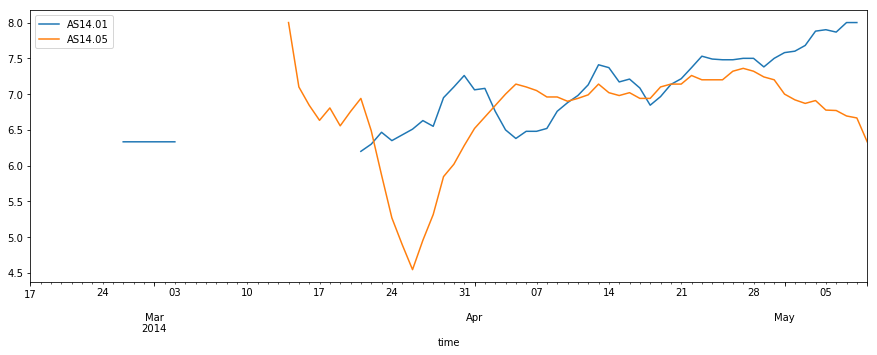

In [103]:
#look again at a couple of patients' mood over time
for patient in ('AS14.01','AS14.05'):
    preprod.loc[patient]['mood'].plot(label=patient, title='Mood of two patients (moving average)')
plt.legend();

In [105]:
#look at all patients' mood over time
plt.rcParams["figure.figsize"] = [15,10]
for patient in preprod.index.levels[0]:
    preprod.loc[patient]['mood'].plot(label=patient, title='Mood of all patients (moving average)')
plt.legend();